In [2]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('input/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)

In [6]:
m,n  = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
def init_params():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10,1) - 0.5
  W2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return W1,b1,W2,b2

In [8]:
def RelU(Z):
  return np.maximum(0,Z);

In [9]:
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

In [10]:
def forward_prop(W1,b1,W2,b2,X):
  Z1=W1.dot(X) + b1
  A1=RelU(Z1)
  Z2= W2.dot(A1) + b2
  A2=softmax(Z2)
  return Z1, A1, Z2, A2

In [11]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [12]:
def derivative_RelU(Z):
  return Z > 0 # slope is 1 for Z>0, and 0 for negative Z

In [13]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * derivative_RelU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

In [14]:
def update_params(W1,b1,W2,b2, dW1, db1, dW2, db2, alpha):
  W1= W1 -alpha * dW1;
  b1= b1 -alpha * db1;
  W2= W2 -alpha * dW2;
  b2= b2 -alpha * db2;
  return W1,b1, W2,b2 

In [15]:
def get_predictions(A2):
  return np.argmax(A2,0);

In [16]:
def get_accuracy(predictions,Y):
  print(predictions,Y)
  return np.sum(predictions == Y) / Y.size

In [17]:
def gradient_descent(X,Y, iterations,alpha):
  W1,b1,W2,b2 = init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    if(i%50 == 0):
      print("Iteration:", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
  return W1,b1,W2,b2;

In [ ]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train, 500, 0.1)

visualize predictions

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  9


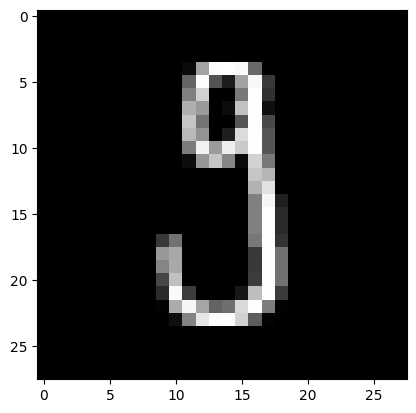

Prediction:  [2]
Label:  2


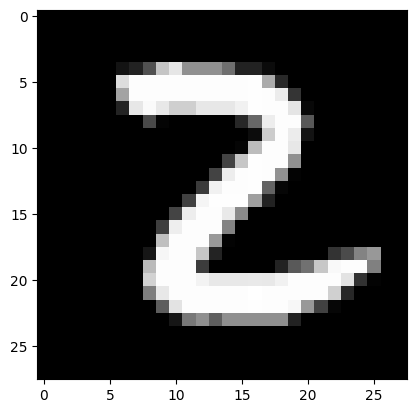

Prediction:  [0]
Label:  0


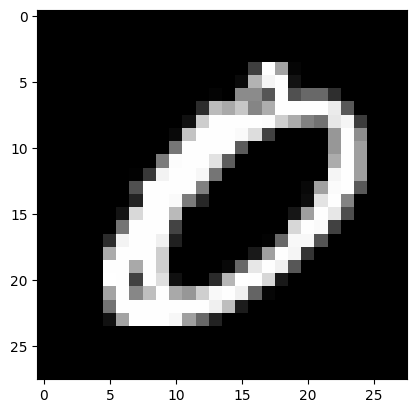

Prediction:  [2]
Label:  2


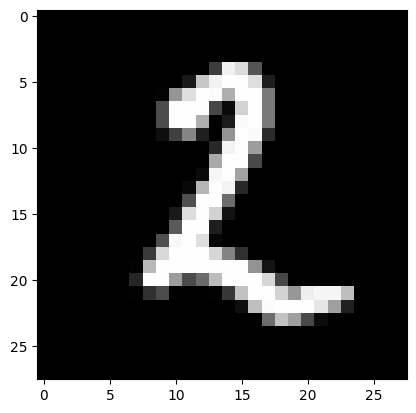

In [20]:
#vizualise image and prediction
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [21]:
#test for not training data
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)



[4 3 8 0 2 9 4 4 6 9 7 0 2 7 3 1 3 9 5 0 3 1 9 8 2 0 9 3 0 6 2 4 5 9 8 6 4
 7 9 7 5 6 2 5 4 7 6 5 4 2 2 9 9 9 4 6 8 6 0 7 9 6 5 4 9 9 5 8 8 9 9 1 9 3
 9 1 9 2 8 8 1 4 6 1 7 5 1 8 7 4 8 8 3 1 7 6 6 5 7 4 2 9 1 0 1 6 1 2 0 9 6
 0 0 2 6 1 3 4 5 0 0 0 9 3 3 6 4 8 2 5 9 2 1 7 0 3 6 4 8 6 1 7 9 9 8 4 9 1
 8 0 3 1 6 3 7 8 4 1 1 7 0 2 7 7 3 7 0 2 0 5 0 1 6 7 3 9 7 7 7 5 1 1 4 7 6
 4 3 8 4 4 9 4 9 1 3 6 8 7 0 1 0 8 8 0 4 3 6 6 6 1 0 7 1 9 9 2 7 8 7 6 9 7
 1 0 4 6 4 4 3 8 5 9 0 2 6 6 7 5 2 3 9 5 1 5 5 4 3 7 4 7 7 2 9 4 0 9 5 7 1
 1 1 0 4 3 6 1 9 2 6 1 4 3 2 1 2 0 2 5 7 5 3 2 9 4 6 7 7 1 1 7 9 0 4 7 1 3
 3 7 4 9 8 6 9 4 5 6 3 1 9 3 4 9 3 2 7 1 0 8 6 3 0 1 0 4 3 0 4 9 0 3 7 9 9
 6 7 7 7 7 6 0 0 3 4 3 0 3 2 1 7 0 2 9 0 2 6 4 4 4 4 8 5 1 7 7 0 4 6 7 8 4
 6 5 3 4 0 6 0 6 4 3 5 5 6 0 7 2 6 0 0 5 4 1 8 6 7 8 6 1 4 2 0 3 1 1 9 1 8
 1 6 8 2 9 8 8 6 8 3 9 8 0 4 7 7 8 5 7 3 6 0 5 4 7 7 7 2 9 0 0 4 7 6 4 9 9
 0 9 1 3 1 4 4 6 4 6 5 7 3 7 8 1 5 4 2 8 1 1 1 4 1 9 4 4 6 9 3 0 9 0 0 6 4
 7 6 0 1 3 2 8 2 7 2 4 3 

0.841